In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
import re
import nltk
from nltk.stem import WordNetLemmatizer, PorterStemmer
from nltk.tokenize import word_tokenize
from scipy.stats import ttest_ind
import graphviz

In [4]:
data_fake = pd.read_csv("Fake.csv")


data_true = pd.read_csv('True.csv')

In [5]:
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Hp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Hp\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Hp\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [6]:
data_fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [7]:
data_fake["class"]=0
data_true["class"]=1

In [8]:
data_fake.shape,data_true.shape

((23481, 5), (21417, 5))

In [9]:
data_true.head()

,title,text,subject,date,class
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1


In [10]:
news=pd.concat([data_fake,data_true],axis=0)

In [11]:
news.head()

,title,text,subject,date,class
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0


In [12]:
news.tail()

,title,text,subject,date,class
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017",1
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017",1
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017",1
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017",1
21416,Indonesia to buy $1.14 billion worth of Russia...,JAKARTA (Reuters) - Indonesia will buy 11 Sukh...,worldnews,"August 22, 2017",1


In [13]:
news.isnull().sum()

title      0
text       0
subject    0
date       0
class      0
dtype: int64

In [14]:
news= news.drop(['title','subject','date'],axis=1)

In [15]:
news = news.sample(frac=1)  #Reshuffling

In [16]:
news.head()

,text,class
3528,(Reuters) - Tensions between Republicans and D...,1
14719,"LONDON (Reuters) - Manfred Weber, a leading la...",1
11348,CARACAS (Reuters) - Venezuelan authorities hav...,1
20799,Fundamental transformation Obama style Henry C...,0
2963,WASHINGTON (Reuters) - The top U.S. Senate Rep...,1


In [17]:
news.reset_index(inplace = True)

In [18]:
news.head()

,index,text,class
0,3528,(Reuters) - Tensions between Republicans and D...,1
1,14719,"LONDON (Reuters) - Manfred Weber, a leading la...",1
2,11348,CARACAS (Reuters) - Venezuelan authorities hav...,1
3,20799,Fundamental transformation Obama style Henry C...,0
4,2963,WASHINGTON (Reuters) - The top U.S. Senate Rep...,1


In [19]:
news.drop(['index'],axis=1,inplace=True)

In [20]:
news.head()

,text,class
0,(Reuters) - Tensions between Republicans and D...,1
1,"LONDON (Reuters) - Manfred Weber, a leading la...",1
2,CARACAS (Reuters) - Venezuelan authorities hav...,1
3,Fundamental transformation Obama style Henry C...,0
4,WASHINGTON (Reuters) - The top U.S. Senate Rep...,1


In [21]:
def wordopt(text):
    text = text.lower()
    text = re.sub(r'https?://\S+|www\.\S+', '', text)
    text = re.sub(r'<.*?>', '', text)
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r'\d', '', text)
    text = re.sub(r'\n', ' ', text)
    
    # Tokenization
    words = word_tokenize(text)
    
    # Remove stopwords
    words = [word for word in words if word not in ENGLISH_STOP_WORDS]
    
    # Lemmatization and stemming
    lemmatizer = WordNetLemmatizer()
    stemmer = PorterStemmer()
    words = [lemmatizer.lemmatize(word) for word in words]
    words = [stemmer.stem(word) for word in words]
    
    return ' '.join(words)

# Apply preprocessing
news['text'] = news['text'].apply(wordopt)

# Split data into features and labels
x = news['text']
y = news['class']

In [22]:
x

0        reuter tension republican democrat boil floor ...
1        london reuter manfr weber lead lawmak european...
2        caraca reuter venezuelan author far releas opp...
3        fundament transform obama style henri claud ag...
4        washington reuter senat republican struggl wed...
                               ...                        
44893    mexico beneficiari open border decad s realli ...
44894    reuter presidentelect donald trump said thursd...
44895    cairo reuter arab leagu hold emerg meet saturd...
44896    new york reuter defi opinion poll expert predi...
44897    washington reuter investig possibl russian med...
Name: text, Length: 44898, dtype: object

In [23]:
y

0        1
1        1
2        1
3        0
4        1
        ..
44893    0
44894    1
44895    1
44896    1
44897    1
Name: class, Length: 44898, dtype: int64

In [33]:
from sklearn.model_selection import train_test_split

In [34]:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.3)

In [35]:
x_train.shape

(31428,)

In [36]:
x_test.shape

(13470,)

In [37]:
!pip show scikit-learn


Name: scikit-learn
Version: 1.2.2
Summary: A set of python modules for machine learning and data mining
Home-page: http://scikit-learn.org
Author: 
Author-email: 
License: new BSD
Location: C:\Users\Hp\anaconda3\Lib\site-packages
Requires: joblib, numpy, scipy, threadpoolctl
Required-by: imbalanced-learn


In [38]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [39]:
vectorization = TfidfVectorizer()

In [40]:

xv_train =vectorization.fit_transform(x_train)

In [41]:
xv_test = vectorization.transform(x_test)

In [42]:
xv_test

<13470x147842 sparse matrix of type '<class 'numpy.float64'>'
	with 1847179 stored elements in Compressed Sparse Row format>

In [43]:
from sklearn.linear_model import LogisticRegression

In [44]:
LR = LogisticRegression()

In [45]:
LR.fit(xv_train,y_train)

LogisticRegression()

In [46]:
pred_lr = LR.predict(xv_test)

In [47]:
LR.score(xv_test,y_test)

0.9864884929472902

In [48]:
print(classification_report(y_test,pred_lr))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      7048
           1       0.99      0.99      0.99      6422

    accuracy                           0.99     13470
   macro avg       0.99      0.99      0.99     13470
weighted avg       0.99      0.99      0.99     13470



In [49]:
from sklearn.tree import DecisionTreeClassifier

In [50]:
DTC = DecisionTreeClassifier()

In [51]:
DTC.fit(xv_train,y_train)

DecisionTreeClassifier()

In [52]:
pip install graphviz

Note: you may need to restart the kernel to use updated packages.


In [53]:
pred_dtc = DTC.predict(xv_test)

In [54]:
DTC.score(xv_test,y_test)

0.9945805493689681

In [55]:
print(classification_report(y_test,pred_dtc))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99      7048
           1       0.99      1.00      0.99      6422

    accuracy                           0.99     13470
   macro avg       0.99      0.99      0.99     13470
weighted avg       0.99      0.99      0.99     13470



In [56]:
from sklearn.ensemble import RandomForestClassifier

In [57]:
rfc = RandomForestClassifier()

In [58]:
rfc.fit(xv_train,y_train)

RandomForestClassifier()

In [59]:
predict_rfc= rfc.predict(xv_test)

In [60]:
rfc.score(xv_test,y_test)

0.9890126206384559

In [61]:
print(classification_report(y_test,predict_rfc))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      7048
           1       0.99      0.99      0.99      6422

    accuracy                           0.99     13470
   macro avg       0.99      0.99      0.99     13470
weighted avg       0.99      0.99      0.99     13470



In [62]:
from sklearn.ensemble import GradientBoostingClassifier

In [63]:
gbc = GradientBoostingClassifier()

In [64]:
gbc.fit(xv_test,y_test)

GradientBoostingClassifier()

In [65]:
pred_gbc = gbc.predict(xv_test)

In [66]:
gbc.score(xv_test,y_test)

0.9962880475129918

In [67]:
print(classification_report(y_test,pred_gbc))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00      7048
           1       0.99      1.00      1.00      6422

    accuracy                           1.00     13470
   macro avg       1.00      1.00      1.00     13470
weighted avg       1.00      1.00      1.00     13470



C:\Users\Hp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


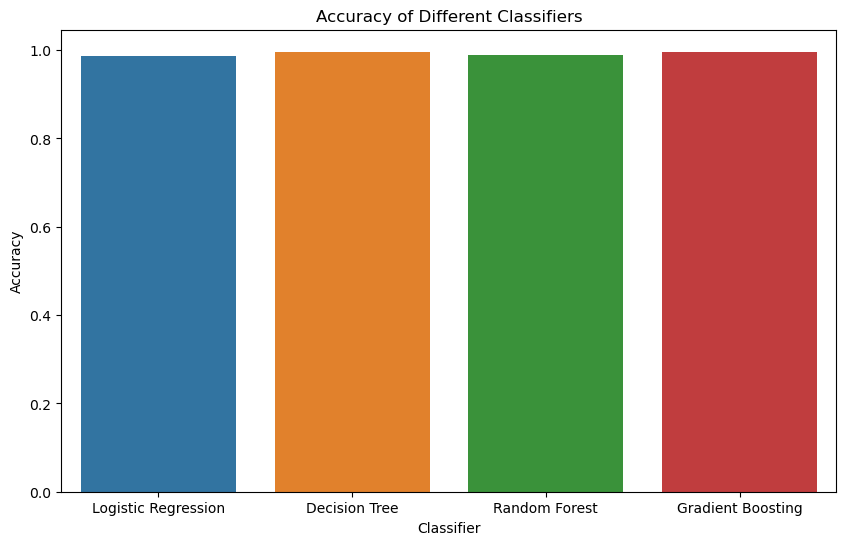

In [68]:
accuracy_scores = {
    'Logistic Regression': accuracy_score(y_test, pred_lr),
    'Decision Tree': accuracy_score(y_test, pred_dtc),
    'Random Forest': accuracy_score(y_test, predict_rfc),
    'Gradient Boosting': accuracy_score(y_test, pred_gbc)
}

plt.figure(figsize=(10, 6))
sns.barplot(x=list(accuracy_scores.keys()), y=list(accuracy_scores.values()))
plt.xlabel('Classifier')
plt.ylabel('Accuracy')
plt.title('Accuracy of Different Classifiers')
plt.show()

In [69]:
def output_label(n):
  if n==0:
    return "It is a fake news"
  elif n==1:
    return "It is a genuine news"

In [70]:
def manual_testing (news):
    testing_news = {"text": [news]} # Corrected syntax for defining dictionary
    new_def_test = pd.DataFrame(testing_news)
    new_def_test["text"] = new_def_test["text"].apply(wordopt)
    new_x_test = new_def_test["text"]
    new_xv_test = vectorization. transform(new_x_test) # Assuming 'vectorization' is your vectorizer object
    pred_lr= LR.predict(new_xv_test)
    # pred_dtc = dtc.predict(new_xv_test)
    pred_gbc = gbc.predict(new_xv_test)
    pred_rfc = rfc.predict(new_xv_test)
    return "\n\nLR Prediction: {} \nGBC Prediction: {} \nRFC Prediction: {}".format(output_label (pred_lr[0]), output_label(pred_gbc[0]), output_label(pred_rfc[0]))

In [1]:
news_article=(str(input()))

 Donald Trump just couldn t wish all Americans a Happy New Year and leave it at that


In [2]:
manual_testing(news_article)

NameError: name 'manual_testing' is not defined

In [71]:
from scipy.stats import ttest_ind

lr_accuracy = accuracy_score(y_test, pred_lr)
dtc_accuracy = accuracy_score(y_test, pred_dtc)
rfc_accuracy = accuracy_score(y_test, predict_rfc)
gbc_accuracy = accuracy_score(y_test, pred_gbc)

_, p_value_lr_dtc = ttest_ind(pred_lr, pred_dtc, equal_var=False)
_, p_value_lr_rfc = ttest_ind(pred_lr, predict_rfc, equal_var=False)
_, p_value_lr_gbc = ttest_ind(pred_lr, pred_gbc, equal_var=False)

print(f"T-test P-value (LR vs DTC): {p_value_lr_dtc}")
print(f"T-test P-value (LR vs RFC): {p_value_lr_rfc}")
print(f"T-test P-value (LR vs GBC): {p_value_lr_gbc}")


T-test P-value (LR vs DTC): 0.9513708910028777
T-test P-value (LR vs RFC): 0.8452786763104365
T-test P-value (LR vs GBC): 0.8072855776945791


In [72]:
alpha = 0.05
print("\nHypothesis Testing Results:")
print(f"LR vs DTC: {'Reject null hypothesis' if p_value_lr_dtc < alpha else 'Fail to reject null hypothesis'}")
print(f"LR vs RFC: {'Reject null hypothesis' if p_value_lr_rfc < alpha else 'Fail to reject null hypothesis'}")
print(f"LR vs GBC: {'Reject null hypothesis' if p_value_lr_gbc < alpha else 'Fail to reject null hypothesis'}")



Hypothesis Testing Results:
LR vs DTC: Fail to reject null hypothesis
LR vs RFC: Fail to reject null hypothesis
LR vs GBC: Fail to reject null hypothesis


C:\Users\Hp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


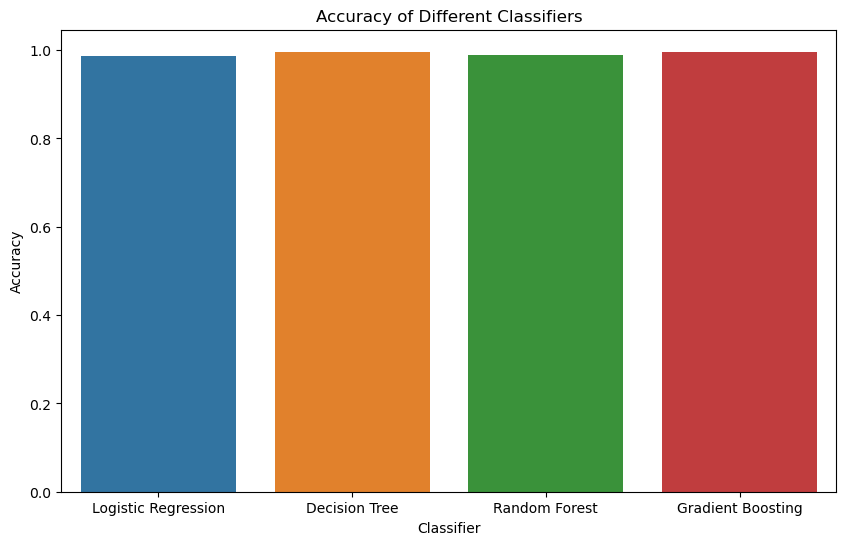

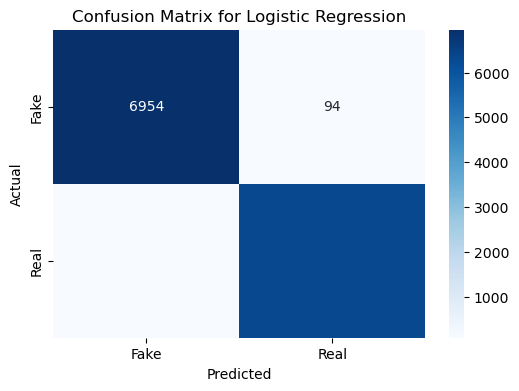

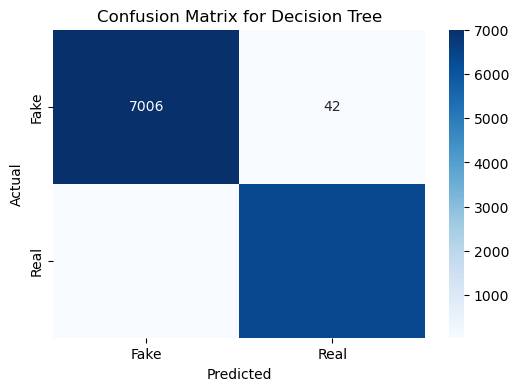

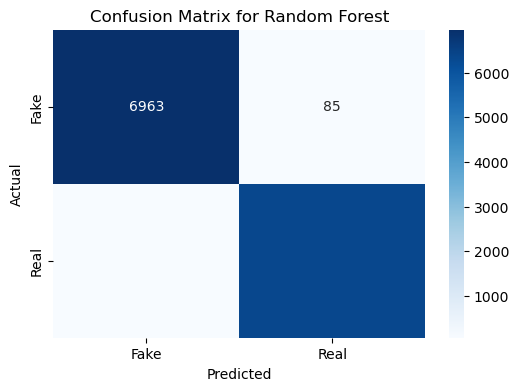

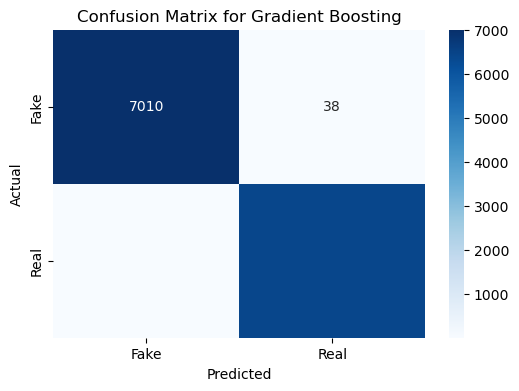

In [74]:
# Visualizing Accuracy Scores
accuracy_scores = {
    'Logistic Regression': accuracy_score(y_test, pred_lr),
    'Decision Tree': accuracy_score(y_test, pred_dtc),
    'Random Forest': accuracy_score(y_test, predict_rfc),
    'Gradient Boosting': accuracy_score(y_test, pred_gbc)
}

plt.figure(figsize=(10, 6))
sns.barplot(x=list(accuracy_scores.keys()), y=list(accuracy_scores.values()))
plt.xlabel('Classifier')
plt.ylabel('Accuracy')
plt.title('Accuracy of Different Classifiers')
plt.show()

# Function to plot confusion matrix
def plot_confusion_matrix(cm, title):
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Fake', 'Real'], yticklabels=['Fake', 'Real'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(title)
    plt.show()

# Confusion matrices
cm_lr = confusion_matrix(y_test, pred_lr)
cm_dtc = confusion_matrix(y_test, pred_dtc)
cm_rfc = confusion_matrix(y_test, predict_rfc)
cm_gbc = confusion_matrix(y_test, pred_gbc)

# Plot confusion matrices
plot_confusion_matrix(cm_lr, "Confusion Matrix for Logistic Regression")
plot_confusion_matrix(cm_dtc, "Confusion Matrix for Decision Tree")
plot_confusion_matrix(cm_rfc, "Confusion Matrix for Random Forest")
plot_confusion_matrix(cm_gbc, "Confusion Matrix for Gradient Boosting")



In [75]:
print(accuracy_scores)

{'Logistic Regression': 0.9864884929472902, 'Decision Tree': 0.9945805493689681, 'Random Forest': 0.9890126206384559, 'Gradient Boosting': 0.9962880475129918}
